In [1]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt



Parameterliste festlegen:

In [2]:
timesteps = 10
# dim = [1,2,3,4,6,8,12] #S2
# dim = [1,2,3,6,9]   #S1
dim = [2]
# dens =  [0.3, 0.5, 0.7, 0.3, 0.5, 0.7]
dens = 1
# rc = [22,10,6,4,2,1,0]  #S2
# rc = [16,7,4,1,0]  #S1
rc = [2]
birthrate = 0.5
deathrate = 0.3

saving = False
rep = 1

Schleife um Paraliste abzuarbeiten:

standard deviation set to =  0.1
Progress: [####################] 100% Done...
tmax 11
val [[0.         0.125      0.125      0.125      0.125      0.125
  0.125      0.125      0.125     ]
 [0.         0.2        0.2        0.2        0.         0.
  0.2        0.         0.2       ]
 [0.         0.33333333 0.         0.         0.         0.
  0.66666667 0.         0.        ]
 [0.         0.5        0.         0.         0.         0.
  0.5        0.         0.        ]
 [0.         0.6        0.         0.         0.         0.
  0.4        0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.     

<IPython.core.display.Javascript object>


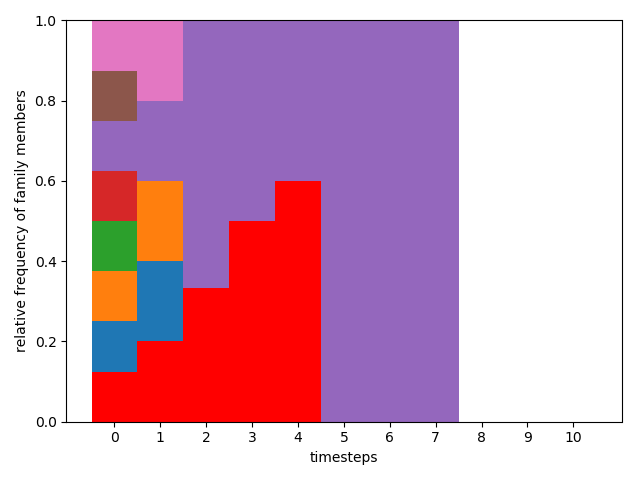

In [3]:
# for i in range(len(birthrate)):
#     lgca= get_lgca(ib=True, geometry='lin', interaction='inheritance',\
#                density = dens, dims = dim, r_b = birthrate[i], variation = False, restchannels = rc ,r_d = deathrate)
for i in range(len(dim)):
    wdh=1
    while wdh <= rep:
        lgca= get_lgca(ib=True, geometry='lin', interaction='inheritance', bc='reflecting',\
               density = dens, dims = dim[i], r_b = birthrate, variation = False, restchannels = rc[i] ,r_d = deathrate)
        id = str(dim[i]) + '_' + str(wdh)
        lgca.timeevo(timesteps, record=True)
        %matplotlib notebook
#         bar_stacked(lgca, save = saving, id = id)
        lgca.bar_stacked_relative(save = saving, id = id)
#         ana_si(lgca, p = True, save = saving, id = id)
        if saving:
            save_data(lgca, id = id)
        #         hillnumber(lgca, 2)
        wdh = wdh +1

In [4]:
t = 0
while t <= timesteps:
    print(lgca.props_t[t]['num_off'][:])
    print('sum', sum(lgca.props_t[t]['num_off'][1:]))
    t += 1

[-99, 1, 1, 1, 1, 1, 1, 1, 1]
sum 8
[-99, 1, 1, 1, 0, 0, 1, 0, 1]
sum 5
[-99, 1, 0, 0, 0, 0, 2, 0, 0]
sum 3
[-99, 2, 0, 0, 0, 0, 2, 0, 0]
sum 4
[-99, 3, 0, 0, 0, 0, 2, 0, 0]
sum 5
[-99, 0, 0, 0, 0, 0, 3, 0, 0]
sum 3
[-99, 0, 0, 0, 0, 0, 2, 0, 0]
sum 2
[-99, 0, 0, 0, 0, 0, 1, 0, 0]
sum 1
[-99, 0, 0, 0, 0, 0, 0, 0, 0]
sum 0
[-99, 0, 0, 0, 0, 0, 0, 0, 0]
sum 0
[-99, 0, 0, 0, 0, 0, 0, 0, 0]
sum 0


In [5]:
print(entropies(lgca, 1)[0])
# index, max = entropies(lgca, 1)
# print(index)
# print(max)
print(entropies(lgca,2))
print(entropies(lgca, 1.5))

Shannon
extinct since t=  8
[ 2.07944154  1.60943791  0.63651417  0.69314718  0.67301167  0.
  0.          0.         -1.         -1.         -1.        ]
ginisimpson
extinct since t=  8
[ 0.875       0.8         0.44444444  0.5         0.48        0.
  0.          0.         -1.         -1.         -1.        ]
simpson
extinct since t=  8
[ 1.          1.          0.66666667  0.66666667  0.6         0.
  0.          0.         -1.         -1.         -1.        ]


In [8]:
print(hillnumber(lgca,1))
print(hillnumber(lgca,2))
print(hillnumber(lgca, 7))

exp Shannon
Shannon
extinct since t=  8
extinct since t=  8
(array([ 8.        ,  5.        ,  1.88988157,  2.        ,  1.9601317 ,
        1.        ,  1.        ,  1.        , -1.        , -1.        ,
       -1.        ]), 7.999999999999998)
hill2
extinct since t=  8
[ 8.          5.          1.8         2.          1.92307692  1.
  1.          1.         -1.         -1.         -1.        ]
hill2
extinct since t=  8
[ 8.          5.          1.60278959  2.          1.79765566  1.
  1.          1.         -1.         -1.         -1.        ]
